In [38]:
from gurobipy import *

Groundset = range(20)
Subsets   = range(4)
Budget    = 12;
Set = [ [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
        [ 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1 ],
        [ 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0 ],
        [ 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0 ] ]
SetObjPriority = [  3,    2,    2,   1]
SetObjWeight   = [1.0, 0.25, 1.25, 1.0]

In [41]:
model = Model('multiobj')

Elem = model.addVars(Groundset, vtype=GRB.BINARY, name='E1')

model.addConstr(Elem.sum()<=Budget, name='Budget')

model.ModelSense = GRB.MAXIMIZE

model.setParam(GRB.Param.PoolSolutions, 100)

model.NumObj = 4

model.update()

Changed value of parameter PoolSolutions to 100
   Prev: 10  Min: 1  Max: 2000000000  Default: 10


In [42]:
print(model.getAttr('ModelName'))
print(model.getAttr('VarName', Elem))
print(model.getAttr('ModelSense'))
print(model.params.PoolSolutions)
print(model.NumObj)

multiobj
{0: 'E1[0]', 1: 'E1[1]', 2: 'E1[2]', 3: 'E1[3]', 4: 'E1[4]', 5: 'E1[5]', 6: 'E1[6]', 7: 'E1[7]', 8: 'E1[8]', 9: 'E1[9]', 10: 'E1[10]', 11: 'E1[11]', 12: 'E1[12]', 13: 'E1[13]', 14: 'E1[14]', 15: 'E1[15]', 16: 'E1[16]', 17: 'E1[17]', 18: 'E1[18]', 19: 'E1[19]'}
-1
100
4


In [57]:
for i in Subsets:
        model.setParam(GRB.Param.ObjNumber, i)
        model.ObjNPriority = SetObjPriority[i]
        model.ObjNWeight   = SetObjWeight[i]

        model.ObjNName = 'Set' + str(i)
        model.ObjNRelTol = 0.01
        model.ObjNAbsTol = 1.0 + i
        model.setAttr(GRB.Attr.ObjN, quicksum(Elem[j]*Set[i][j] for j in Groundset))
        

Changed value of parameter ObjNumber to 0
   Prev: 3  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Changed value of parameter ObjNumber to 1
   Prev: 0  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Changed value of parameter ObjNumber to 2
   Prev: 1  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Changed value of parameter ObjNumber to 3
   Prev: 2  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute


In [58]:
model.optimize()

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 4 objectives (3 combined) ...
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve time: 0.00s
Presolved: 1 rows and 20 columns
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (Set0) ...
---------------------------------------------------------------------------

Found heuristic solution: objective 10

Explored 0 nodes (0 simplex iterations) in 0.03 seconds
Thread count was 1 (of

In [59]:
for i in Subsets:
    model.setParam(GRB.Param.ObjNumber, i)
    print(model.ObjNVal)

Changed value of parameter ObjNumber to 0
   Prev: 3  Min: 0  Max: 2000000000  Default: 0
9.0
Changed value of parameter ObjNumber to 1
   Prev: 0  Min: 0  Max: 2000000000  Default: 0
7.0
Changed value of parameter ObjNumber to 2
   Prev: 1  Min: 0  Max: 2000000000  Default: 0
6.0
Changed value of parameter ObjNumber to 3
   Prev: 2  Min: 0  Max: 2000000000  Default: 0
7.0


In [62]:
for i in Subsets:
    model.setParam(GRB.Param.ObjNumber, i)
    model.setAttr('ObjNPriority', SetObjPriority[i])
    model.setAttr('ObjNWeight', SetObjWeight[i])
    model.setAttr('ObjNRelTol', 0.01)
    model.setAttr('ObjNAbsTol', 1+i)
    model.setAttr('ObjNName', 'Set'+str(i))
    model.setAttr(GRB.Attr.ObjN, quicksum(Elem[j]*Set[i][j] for j in Groundset))
    
model.optimize()

Parameter ObjNumber unchanged
   Value: 0  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Changed value of parameter ObjNumber to 1
   Prev: 0  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Changed value of parameter ObjNumber to 2
   Prev: 1  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Changed value of parameter ObjNumber to 3
   Prev: 2  Min: 0  Max: 2000000000  Default: 0
Attribute ObjN is not a Model attribute
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 4 objectives (3 combined) ...
---------------------------------------------------------------------

In [63]:
for i in Subsets:
    model.setParam(GRB.Param.ObjNumber, i)
    print(model.ObjNVal)

Changed value of parameter ObjNumber to 0
   Prev: 3  Min: 0  Max: 2000000000  Default: 0
9.0
Changed value of parameter ObjNumber to 1
   Prev: 0  Min: 0  Max: 2000000000  Default: 0
7.0
Changed value of parameter ObjNumber to 2
   Prev: 1  Min: 0  Max: 2000000000  Default: 0
6.0
Changed value of parameter ObjNumber to 3
   Prev: 2  Min: 0  Max: 2000000000  Default: 0
7.0


In [149]:
timelimit_baseline = 1800
timelimit0 = 120
time_factor = 1.5
n_iter_per_stage = 10
import numpy as np
timelimit = [max(timelimit_baseline, timelimit0*2**(np.floor(idx/n_iter_per_stage)/time_factor) ) for idx in range(100)]


In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

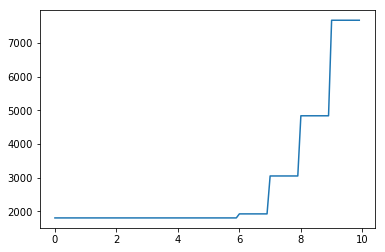

In [151]:
plt.figure(1)
plt.plot(np.arange(0, 100)/n_iter_per_stage, timelimit)

In [152]:
sum(timelimit)/3600/24

3.2738318115017644

In [153]:
timelimit[-1]/3600

2.1333333333333333